In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
from functions import *

In [2]:
df= pd.read_csv('train.csv')

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
df['datetime'] = pd.to_datetime(df.datetime)

In [5]:
df['date']= df['datetime'].dt.date 

In [6]:
df['hours'] = df['datetime'].dt.hour

In [7]:
df['day_of_week'] = df['datetime'].dt.day_name()

In [8]:
df.dtypes

datetime       datetime64[ns]
season                  int64
holiday                 int64
workingday              int64
weather                 int64
temp                  float64
atemp                 float64
humidity                int64
windspeed             float64
casual                  int64
registered              int64
count                   int64
date                   object
hours                   int64
day_of_week            object
dtype: object

In [9]:
df = df.astype({'season': 'object', 'holiday':'object', 'workingday': 'object', 'weather': 'object'})

In [10]:
df.dtypes

datetime       datetime64[ns]
season                 object
holiday                object
workingday             object
weather                object
temp                  float64
atemp                 float64
humidity                int64
windspeed             float64
casual                  int64
registered              int64
count                   int64
date                   object
hours                   int64
day_of_week            object
dtype: object

In [11]:
df = df.drop(['date', 'datetime'], axis=1)

In [12]:
dfmatrix = df.to_numpy()
dfmatrix

array([[1, 0, 0, ..., 16, 0, 'Saturday'],
       [1, 0, 0, ..., 40, 1, 'Saturday'],
       [1, 0, 0, ..., 32, 2, 'Saturday'],
       ...,
       [4, 0, 1, ..., 168, 21, 'Wednesday'],
       [4, 0, 1, ..., 129, 22, 'Wednesday'],
       [4, 0, 1, ..., 88, 23, 'Wednesday']], dtype=object)

In [13]:
from kmodes.kprototypes import KPrototypes

3 ou 4 cluster

In [14]:
df.loc[(df['atemp'] == 12.12) & (df['temp']>20), 'atemp'] = df.loc[(df['atemp'] == 12.12) & (df['temp']>20), 'temp'] 


In [15]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [16]:
features =X2.columns
pcs= pca.components_
display_circles(pcs, 5, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

NameError: name 'X2' is not defined

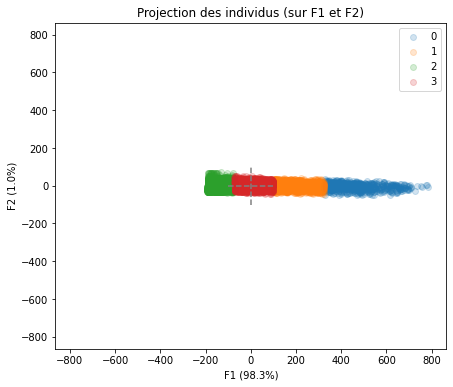

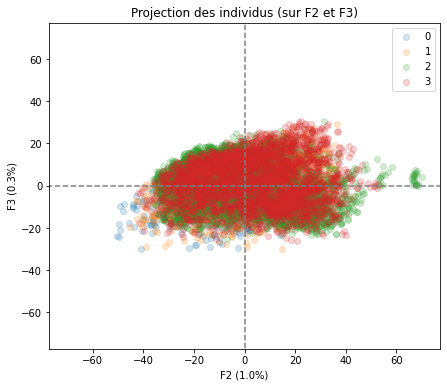

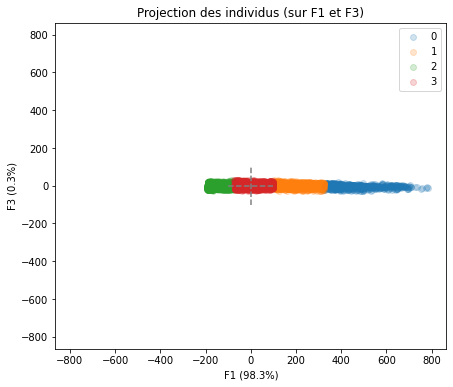

In [ ]:
X_projected=pca.transform(X2)
n_comp=4
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2),(0,2)], alpha = 0.2, illustrative_var=predict_catego)

In [ ]:
X = df[['temp', 'humidity', 'windspeed']]

In [ ]:
X

,temp,humidity,windspeed
0,9.84,81,0.0000
1,9.02,80,0.0000
2,9.02,80,0.0000
3,9.84,75,0.0000
4,9.84,75,0.0000
...,...,...,...
10881,15.58,50,26.0027
10882,14.76,57,15.0013
10883,13.94,61,15.0013
10884,13.94,61,6.0032


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
intertia = []
K = range(2,15)
for k in K:
    Kmean = KMeans(n_clusters=k, algorithm='auto')
    Kmean.fit(X)
    intertia.append(Kmean.inertia_)

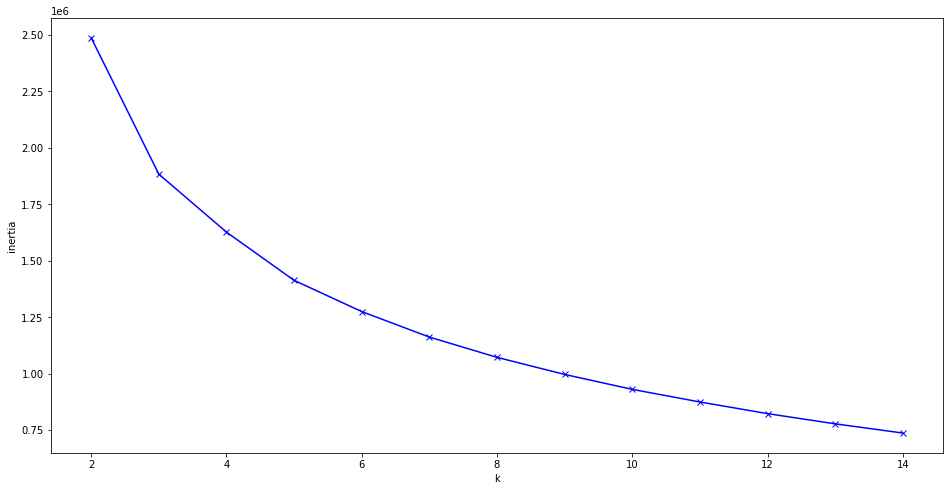

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, intertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [ ]:
predict_catego = Kmean.predict(X)

In [ ]:
from sklearn.metrics import silhouette_score

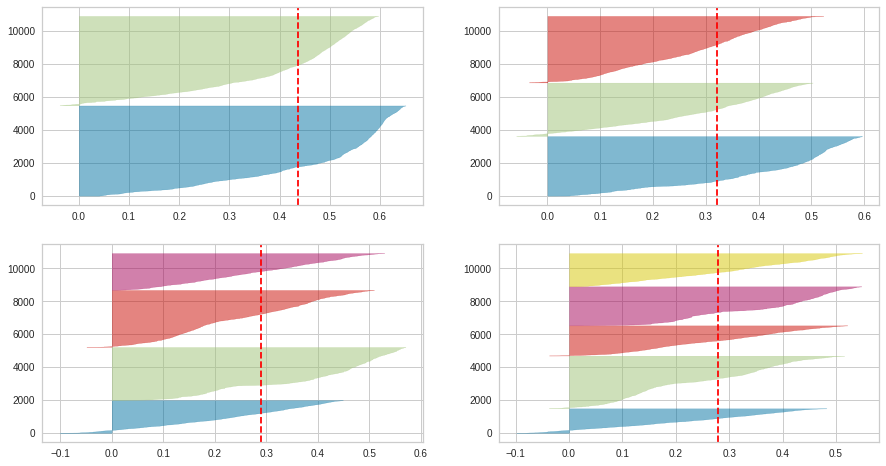

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3,4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++')
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [ ]:
n_cluster = 4

In [ ]:
kmodel = KMeans(n_clusters=n_cluster)
kmodel.fit(X)
predict_cluster = kmodel.predict(X)

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
X['cluster'] = predict_cluster

/tmp/ipykernel_4639/1727651937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = predict_cluster


In [ ]:
X


,temp,humidity,windspeed,cluster
0,9.84,81,0.0000,1
1,9.02,80,0.0000,1
2,9.02,80,0.0000,1
3,9.84,75,0.0000,1
4,9.84,75,0.0000,1
...,...,...,...,...
10881,15.58,50,26.0027,3
10882,14.76,57,15.0013,3
10883,13.94,61,15.0013,2
10884,13.94,61,6.0032,2


In [ ]:
df = df.astype({"weather":"int32"})

In [ ]:
weather = df.weather.to_numpy()

In [ ]:
weather

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
adjusted_rand_score(weather, predict_cluster)

0.01961389064579328

In [ ]:
pca = PCA(n_components=3)

In [ ]:
pca.fit(X)

PCA(n_components=3)

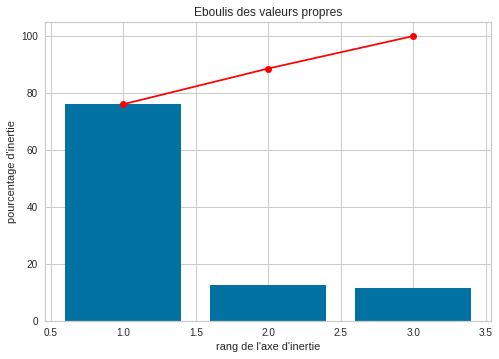

In [ ]:
display_scree_plot(pca)

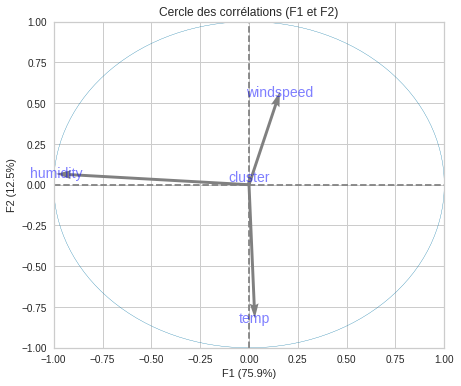

In [ ]:
features =X.columns
pcs= pca.components_
display_circles(pcs, 3, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

In [ ]:
kmodel.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

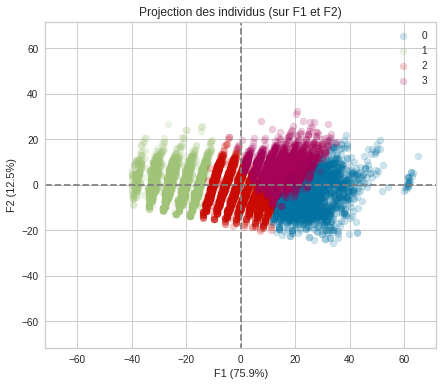

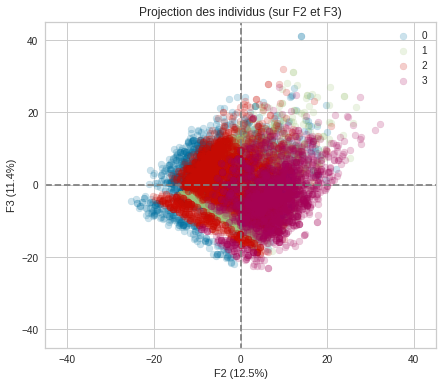

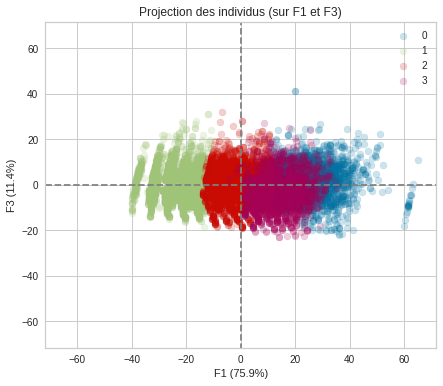

In [ ]:
X_projected=pca.transform(X)
n_comp=3
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2),(0,2)], alpha = 0.2, illustrative_var=kmodel.labels_)

In [ ]:
pca.components_

array([[ 2.96601160e-02, -9.86955382e-01,  1.58238015e-01,
         2.87847054e-04],
       [-8.18462751e-01,  6.66050070e-02,  5.68753100e-01,
         4.69298306e-02],
       [ 5.71329098e-01,  1.46567416e-01,  8.07120787e-01,
        -2.56337759e-02]])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import re, seaborn as sns

/tmp/ipykernel_4639/803349926.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


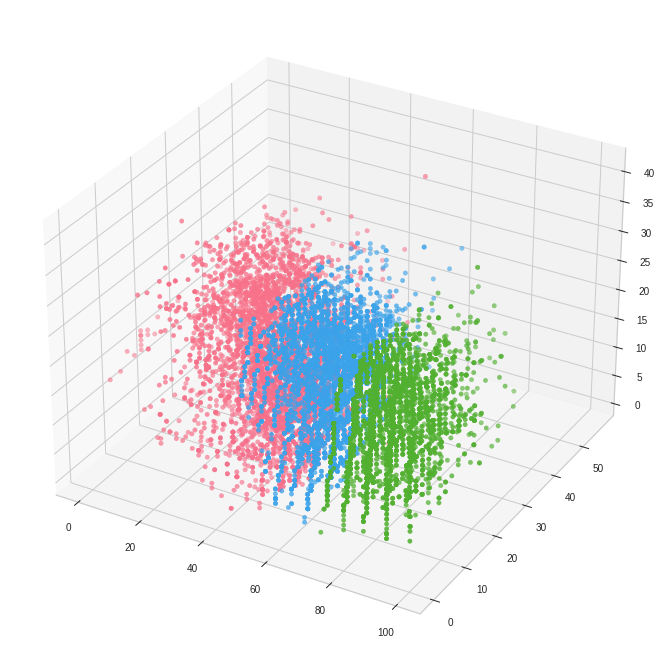

In [ ]:
cmap = ListedColormap(sns.color_palette("red",'blue','green', 'purple', 256).as_hex())
fig = plt.figure(figsize=(16,9))
ax = Axes3D(fig)
ax.scatter(X['humidity'], X['windspeed'],X['temp'],  c=X['cluster'], marker='o',cmap=cmap)

/tmp/ipykernel_4639/4255032083.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


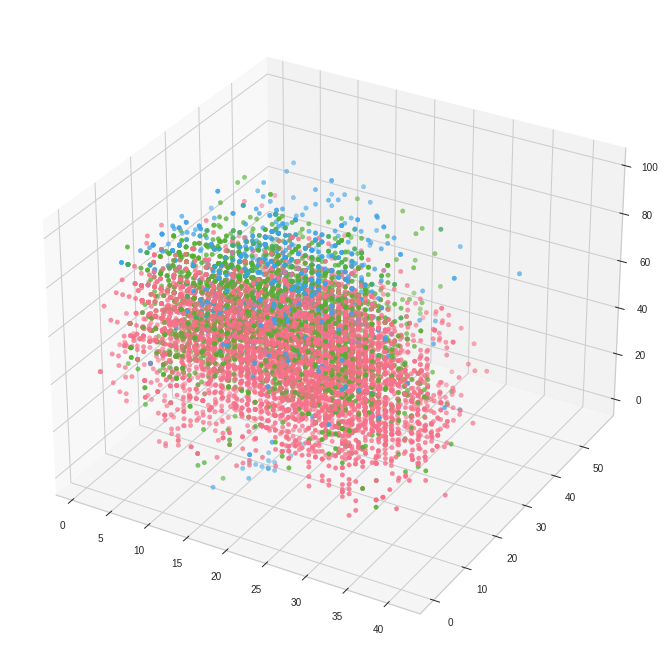

In [ ]:
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
fig = plt.figure(figsize=(16,9))
ax = Axes3D(fig)
ax.scatter( df['temp'],df['windspeed'],df['humidity'],  c=df['weather'], marker='o',cmap=cmap)

In [ ]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hours,day_of_week
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,Saturday
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,Saturday
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,Saturday
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,Saturday
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,Wednesday
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,Wednesday
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,Wednesday
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,Wednesday
